# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\uyang\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZERS = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [7]:
import itertools
from itertools import *
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr , opt in itertools.product(LEARNING_RATE, OPTIMIZERS):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    print("Experiment with opt = %s " % str(opt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    opt = opt(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Experiment with opt = <class 'keras.optimizers.SGD'> 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
__________________________________________________________

Epoch 49/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.6062 - acc: 0.7860 - val_loss: 2.4955 - val_acc: 0.4107
Epoch 50/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.5594 - acc: 0.8029 - val_loss: 2.1424 - val_acc: 0.4831
Experiment with LR = 0.100000
Experiment with opt = <class 'keras.optimizers.RMSprop'> 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
________________________________________

Epoch 46/50
50000/50000 [==============================] - 12s 235us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 12s 233us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 12s 234us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 12s 239us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 12s 234us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000
Experiment with opt = <class 'keras.optimizers.Adagrad'> 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____

Epoch 43/50
50000/50000 [==============================] - 11s 224us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 11s 225us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 11s 226us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 11s 225us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 11s 224us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 11s 227us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 11s 226us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

Epoch 40/50
50000/50000 [==============================] - 14s 272us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 14s 271us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 14s 271us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 13s 261us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 13s 263us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 13s 261us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 13s 260us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

Epoch 38/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.2041 - acc: 0.5707 - val_loss: 1.4853 - val_acc: 0.4798
Epoch 39/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.1892 - acc: 0.5782 - val_loss: 1.4145 - val_acc: 0.5037
Epoch 40/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.1799 - acc: 0.5815 - val_loss: 1.4003 - val_acc: 0.4998
Epoch 41/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.1675 - acc: 0.5840 - val_loss: 1.4619 - val_acc: 0.4864
Epoch 42/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.1624 - acc: 0.5888 - val_loss: 1.4902 - val_acc: 0.4834
Epoch 43/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.1410 - acc: 0.5962 - val_loss: 1.5865 - val_acc: 0.4485
Epoch 44/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.1342 - acc: 0.5972 - val_loss: 1.4049 - val_acc: 0.5058
Epoch 45/50
50000/50000 [==

50000/50000 [==============================] - 12s 231us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 11s 230us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 12s 231us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 12s 231us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 12s 231us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 12s 231us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 12s 230us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/

50000/50000 [==============================] - 11s 217us/step - loss: 1.0535 - acc: 0.6273 - val_loss: 1.4963 - val_acc: 0.5022
Epoch 33/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.0315 - acc: 0.6362 - val_loss: 1.4685 - val_acc: 0.5005
Epoch 34/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.0186 - acc: 0.6397 - val_loss: 1.4441 - val_acc: 0.5096
Epoch 35/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.9987 - acc: 0.6476 - val_loss: 1.4567 - val_acc: 0.5082
Epoch 36/50
50000/50000 [==============================] - 11s 217us/step - loss: 0.9843 - acc: 0.6522 - val_loss: 1.4766 - val_acc: 0.4986
Epoch 37/50
50000/50000 [==============================] - 11s 217us/step - loss: 0.9678 - acc: 0.6610 - val_loss: 1.5699 - val_acc: 0.4761
Epoch 38/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.9515 - acc: 0.6650 - val_loss: 1.4599 - val_acc: 0.5126
Epoch 39/50
50000/50000 [=======

50000/50000 [==============================] - 13s 262us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 13s 260us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 13s 259us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 13s 260us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 13s 261us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 13s 261us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 13s 261us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/

50000/50000 [==============================] - 9s 186us/step - loss: 1.8208 - acc: 0.3593 - val_loss: 1.8209 - val_acc: 0.3566
Epoch 27/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.8118 - acc: 0.3626 - val_loss: 1.8100 - val_acc: 0.3608
Epoch 28/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.8036 - acc: 0.3670 - val_loss: 1.8009 - val_acc: 0.3673
Epoch 29/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7950 - acc: 0.3696 - val_loss: 1.7977 - val_acc: 0.3636
Epoch 30/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.7874 - acc: 0.3717 - val_loss: 1.7884 - val_acc: 0.3663
Epoch 31/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.7804 - acc: 0.3749 - val_loss: 1.7804 - val_acc: 0.3766
Epoch 32/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.7724 - acc: 0.3752 - val_loss: 1.7757 - val_acc: 0.3757
Epoch 33/50
50000/50000 [==============

Epoch 24/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.1615 - acc: 0.5811 - val_loss: 1.6936 - val_acc: 0.4470
Epoch 25/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.1384 - acc: 0.5892 - val_loss: 1.4872 - val_acc: 0.5018
Epoch 26/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.1093 - acc: 0.6003 - val_loss: 1.5587 - val_acc: 0.4911
Epoch 27/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.0811 - acc: 0.6096 - val_loss: 1.4822 - val_acc: 0.5100
Epoch 28/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.0537 - acc: 0.6193 - val_loss: 1.5594 - val_acc: 0.5013
Epoch 29/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.0326 - acc: 0.6290 - val_loss: 1.5990 - val_acc: 0.4717
Epoch 30/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.0074 - acc: 0.6322 - val_loss: 1.5879 - val_acc: 0.4975
Epoch 31/50
50000/50

50000/50000 [==============================] - 11s 218us/step - loss: 1.3993 - acc: 0.5071 - val_loss: 1.4495 - val_acc: 0.4815
Epoch 22/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.3843 - acc: 0.5126 - val_loss: 1.4551 - val_acc: 0.4773
Epoch 23/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.3767 - acc: 0.5163 - val_loss: 1.4940 - val_acc: 0.4655
Epoch 24/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.3697 - acc: 0.5168 - val_loss: 1.4233 - val_acc: 0.4914
Epoch 25/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.3605 - acc: 0.5208 - val_loss: 1.4588 - val_acc: 0.4809
Epoch 26/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.3523 - acc: 0.5229 - val_loss: 1.4132 - val_acc: 0.4960
Epoch 27/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.3424 - acc: 0.5276 - val_loss: 1.4551 - val_acc: 0.4835
Epoch 28/50
50000/50000 [=======

Epoch 19/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.1152 - acc: 0.6021 - val_loss: 1.3564 - val_acc: 0.5266
Epoch 20/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.0965 - acc: 0.6061 - val_loss: 1.3910 - val_acc: 0.5144
Epoch 21/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.0686 - acc: 0.6176 - val_loss: 1.4333 - val_acc: 0.5096
Epoch 22/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.0380 - acc: 0.6271 - val_loss: 1.4277 - val_acc: 0.5142
Epoch 23/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.0207 - acc: 0.6338 - val_loss: 1.3842 - val_acc: 0.5203
Epoch 24/50
50000/50000 [==============================] - 13s 262us/step - loss: 0.9851 - acc: 0.6465 - val_loss: 1.4607 - val_acc: 0.5126
Epoch 25/50
50000/50000 [==============================] - 13s 262us/step - loss: 0.9576 - acc: 0.6548 - val_loss: 1.4010 - val_acc: 0.5265
Epoch 26/50
50000/50

Epoch 17/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.2473 - acc: 0.2210 - val_loss: 2.2459 - val_acc: 0.2157
Epoch 18/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.2448 - acc: 0.2219 - val_loss: 2.2433 - val_acc: 0.2168
Epoch 19/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.2422 - acc: 0.2234 - val_loss: 2.2408 - val_acc: 0.2184
Epoch 20/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.2397 - acc: 0.2251 - val_loss: 2.2383 - val_acc: 0.2194
Epoch 21/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.2372 - acc: 0.2259 - val_loss: 2.2359 - val_acc: 0.2215
Epoch 22/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.2348 - acc: 0.2269 - val_loss: 2.2334 - val_acc: 0.2239
Epoch 23/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.2324 - acc: 0.2283 - val_loss: 2.2310 - val_acc: 0.2245
Epoch 24/50
50000/50000 [==

Epoch 15/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.3743 - acc: 0.5133 - val_loss: 1.3954 - val_acc: 0.4986
Epoch 16/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.3516 - acc: 0.5203 - val_loss: 1.4819 - val_acc: 0.4590
Epoch 17/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.3299 - acc: 0.5301 - val_loss: 1.5083 - val_acc: 0.4608
Epoch 18/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.3139 - acc: 0.5370 - val_loss: 1.4863 - val_acc: 0.4494
Epoch 19/50
50000/50000 [==============================] - 12s 230us/step - loss: 1.2928 - acc: 0.5426 - val_loss: 1.4884 - val_acc: 0.4724
Epoch 20/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.2766 - acc: 0.5481 - val_loss: 1.4474 - val_acc: 0.4932
Epoch 21/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.2559 - acc: 0.5566 - val_loss: 1.5748 - val_acc: 0.4571
Epoch 22/50
50000/50

50000/50000 [==============================] - 11s 217us/step - loss: 1.7519 - acc: 0.3955 - val_loss: 1.7547 - val_acc: 0.3984
Epoch 13/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.7413 - acc: 0.3995 - val_loss: 1.7460 - val_acc: 0.3994
Epoch 14/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.7322 - acc: 0.4024 - val_loss: 1.7397 - val_acc: 0.3993
Epoch 15/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.7237 - acc: 0.4047 - val_loss: 1.7297 - val_acc: 0.4003
Epoch 16/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.7155 - acc: 0.4088 - val_loss: 1.7214 - val_acc: 0.4071
Epoch 17/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.7080 - acc: 0.4115 - val_loss: 1.7142 - val_acc: 0.4083
Epoch 18/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.7006 - acc: 0.4137 - val_loss: 1.7114 - val_acc: 0.4066
Epoch 19/50
50000/50000 [=======

Epoch 10/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.3975 - acc: 0.5046 - val_loss: 1.4462 - val_acc: 0.4855
Epoch 11/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.3573 - acc: 0.5204 - val_loss: 1.4499 - val_acc: 0.4879
Epoch 12/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.3352 - acc: 0.5277 - val_loss: 1.4096 - val_acc: 0.5013
Epoch 13/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.3160 - acc: 0.5374 - val_loss: 1.3949 - val_acc: 0.5042
Epoch 14/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.2893 - acc: 0.5449 - val_loss: 1.4008 - val_acc: 0.5088
Epoch 15/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.2654 - acc: 0.5514 - val_loss: 1.3778 - val_acc: 0.5092
Epoch 16/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.2417 - acc: 0.5618 - val_loss: 1.3694 - val_acc: 0.5100
Epoch 17/50
50000/50

50000/50000 [==============================] - 9s 186us/step - loss: 2.3181 - acc: 0.1054 - val_loss: 2.3160 - val_acc: 0.1045
Epoch 8/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.3169 - acc: 0.1060 - val_loss: 2.3149 - val_acc: 0.1045
Epoch 9/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.3158 - acc: 0.1070 - val_loss: 2.3138 - val_acc: 0.1051
Epoch 10/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.3147 - acc: 0.1072 - val_loss: 2.3128 - val_acc: 0.1054
Epoch 11/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.3138 - acc: 0.1074 - val_loss: 2.3118 - val_acc: 0.1055
Epoch 12/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.3128 - acc: 0.1074 - val_loss: 2.3109 - val_acc: 0.1065
Epoch 13/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.3120 - acc: 0.1084 - val_loss: 2.3101 - val_acc: 0.1062
Epoch 14/50
50000/50000 [================

50000/50000 [==============================] - 12s 235us/step - loss: 1.8536 - acc: 0.3378 - val_loss: 1.8455 - val_acc: 0.3352
Epoch 6/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.8200 - acc: 0.3521 - val_loss: 1.8115 - val_acc: 0.3572
Epoch 7/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.7903 - acc: 0.3636 - val_loss: 1.7787 - val_acc: 0.3761
Epoch 8/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.7650 - acc: 0.3754 - val_loss: 1.7565 - val_acc: 0.3896
Epoch 9/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.7413 - acc: 0.3869 - val_loss: 1.7505 - val_acc: 0.3838
Epoch 10/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.7205 - acc: 0.3933 - val_loss: 1.7382 - val_acc: 0.3829
Epoch 11/50
50000/50000 [==============================] - 12s 232us/step - loss: 1.7012 - acc: 0.4009 - val_loss: 1.7212 - val_acc: 0.3932
Epoch 12/50
50000/50000 [===========

Epoch 3/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.2039 - acc: 0.2084 - val_loss: 2.1959 - val_acc: 0.2082
Epoch 4/50
50000/50000 [==============================] - 11s 219us/step - loss: 2.1908 - acc: 0.2125 - val_loss: 2.1844 - val_acc: 0.2148
Epoch 5/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.1804 - acc: 0.2153 - val_loss: 2.1749 - val_acc: 0.2190
Epoch 6/50
50000/50000 [==============================] - 11s 216us/step - loss: 2.1715 - acc: 0.2188 - val_loss: 2.1666 - val_acc: 0.2271
Epoch 7/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.1636 - acc: 0.2233 - val_loss: 2.1591 - val_acc: 0.2293
Epoch 8/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.1565 - acc: 0.2266 - val_loss: 2.1523 - val_acc: 0.2342
Epoch 9/50
50000/50000 [==============================] - 11s 217us/step - loss: 2.1499 - acc: 0.2299 - val_loss: 2.1460 - val_acc: 0.2355
Epoch 10/50
50000/50000 [==

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 273us/step - loss: 2.1777 - acc: 0.1915 - val_loss: 2.0745 - val_acc: 0.2312
Epoch 2/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.0139 - acc: 0.2548 - val_loss: 1.9604 - val_acc: 0.2835
Epoch 3/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.9206 - acc: 0.3046 - val_loss: 1.8872 - val_acc: 0.3257
Epoch 4/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.8520 - acc: 0.3423 - val_loss: 1.8320 - val_acc: 0.3448
Epoch 5/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.7991 - acc: 0.3705 - val_loss: 1.7826 - val_acc: 0.3823
Epoch 6/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.7588 - acc: 0.3857 - val_loss: 1.7472 - val_acc: 0.3961
Epoch 7/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.7249 - acc: 0.3977 - val_loss: 1.

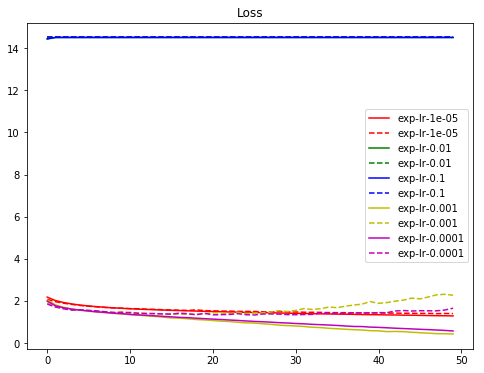

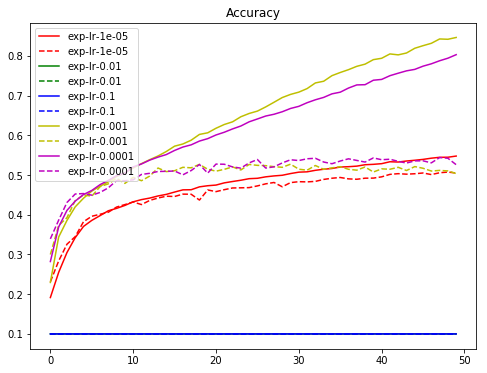

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()